# Introduction

Hello. In this notebook,we will try to classification fruits following these steps: 

* [Importing Libraries](#1)
* [Viewing some samples](#2)
* [Creating model](#3)
* [Data Augmentation](#4)
* [Fitting the model](#5)
* [Evaluating the model](#6)


# Importing Libraries

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

<a id=2></a>
# Viewing some samples

In [17]:
train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"

In [19]:
img = img_to_array(img)
img.shape

(100, 100, 3)

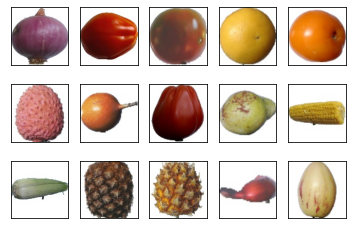

In [20]:

x= os.listdir('fruits-360/Training/')
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    path = 'fruits-360/Training/'
    m = x
    ran = randint(0,len(m)-1)
    new_path = path +m[ran]+'/'
    new_dir_list = os.listdir(new_path)
    ran = randint(0,len(new_dir_list)-1)
    to_show = new_path + new_dir_list[ran]
    img = load_img(to_show)
    plt.imshow(img)
    
    
    

<a id=3></a>
# Creating the model

In [21]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(131, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

In [22]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

<a id=4></a>
# Data Augmentation

In [23]:
train_data = ImageDataGenerator(rescale=1/255, shear_range=0.4, zoom_range=0.4, horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1/255)

In [24]:
train = train_data.flow_from_directory(train_path, target_size = (100,100), batch_size = 32, color_mode="rgb", class_mode = "categorical")
test = test_data.flow_from_directory(test_path, target_size = (100,100), batch_size = 32, color_mode="rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [25]:
from keras.callbacks import EarlyStopping
mycallbacks = [EarlyStopping(monitor='val_accuracy', patience=7)]

<a id=5></a>
# Fitting the model

In [26]:
hist = model.fit_generator(generator=train, steps_per_epoch = 65, epochs = 80, validation_data = test, validation_steps = 65, callbacks = mycallbacks)

C:\Users\Rayhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
65/65 [==============================] - 103s 2s/step - loss: 4.8745 - accuracy: 0.0111 - val_loss: 4.8654 - val_accuracy: 0.0130
Epoch 2/80
65/65 [==============================] - 102s 2s/step - loss: 4.8645 - accuracy: 0.0111 - val_loss: 4.8499 - val_accuracy: 0.0346
Epoch 3/80
65/65 [==============================] - 97s 1s/step - loss: 4.8467 - accuracy: 0.0135 - val_loss: 4.8156 - val_accuracy: 0.0149
Epoch 4/80
65/65 [==============================] - 99s 2s/step - loss: 4.8063 - accuracy: 0.0221 - val_loss: 4.7300 - val_accuracy: 0.0678
Epoch 5/80
65/65 [==============================] - 95s 1s/step - loss: 4.7032 - accuracy: 0.0327 - val_loss: 4.5359 - val_accuracy: 0.0404
Epoch 6/80
65/65 [==============================] - 100s 2s/step - loss: 4.5046 - accuracy: 0.0524 - val_loss: 4.1736 - val_accuracy: 0.0654
Epoch 7/80
65/65 [==============================] - 92s 1s/step - loss: 4.1808 - accuracy: 0.0639 - val_loss: 3.8600 - val_accuracy: 0.0649
Epoch 8/80
65/65 

65/65 [==============================] - 93s 1s/step - loss: 0.5596 - accuracy: 0.8514 - val_loss: 0.2649 - val_accuracy: 0.9216
Epoch 60/80
65/65 [==============================] - 96s 1s/step - loss: 0.2982 - accuracy: 0.8981 - val_loss: 0.3664 - val_accuracy: 0.8947
Epoch 61/80
65/65 [==============================] - 94s 1s/step - loss: 0.2711 - accuracy: 0.9139 - val_loss: 0.3758 - val_accuracy: 0.8832
Epoch 62/80
65/65 [==============================] - 86s 1s/step - loss: 0.2975 - accuracy: 0.9120 - val_loss: 0.3211 - val_accuracy: 0.9053
Epoch 63/80
65/65 [==============================] - 88s 1s/step - loss: 0.2963 - accuracy: 0.9034 - val_loss: 1.8573 - val_accuracy: 0.6269
Epoch 64/80
65/65 [==============================] - 92s 1s/step - loss: 0.3266 - accuracy: 0.8990 - val_loss: 0.3011 - val_accuracy: 0.8976
Epoch 65/80
65/65 [==============================] - 92s 1s/step - loss: 0.2745 - accuracy: 0.9101 - val_loss: 0.3989 - val_accuracy: 0.8764
Epoch 66/80
65/65 [======

<a id=6></a>
# Evaluating the model

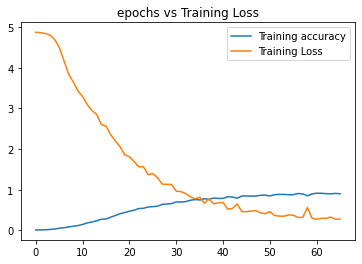

In [28]:
train_accuracy = hist.history['accuracy']
train_loss = hist.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

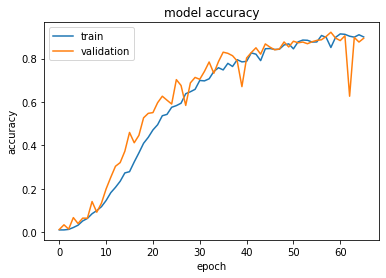

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

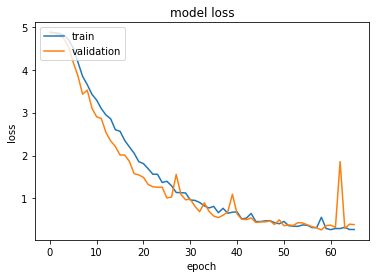

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
import numpy as np
Y_pred=model.predict_generator(test,22688// 65 )
%debugy_pred = np.argmax(Y_pred,axis = 1)

UsageError: Line magic function `%debugy_pred` not found.


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes, y_pred)